In [1]:
# データ準備
import pandas as pd
df = pd.read_csv('./breast-cancer-wisconsin-data/data.csv',skiprows=1, header=None)
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

#パイプライン準備
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#param grid
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid=[{'clf__C':param_range,'clf__kernel':['linear']},
            {'clf__C':param_range,'clf__gamma':param_range,'clf__kernel':['rbf']}]

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl',StandardScaler()), ('clf', SVC(random_state=1))])

from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


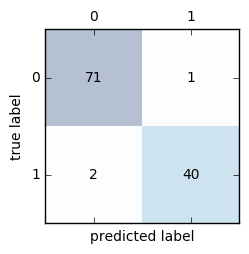

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i, s=confmat[i,j], va='center',ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score

print('Precision: %.3f' % precision_score(y_true=y_test,y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test,y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


In [14]:
from sklearn.metrics import make_scorer, f1_score

#クラス０を陽性として扱った場合のF1値
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer, cv=10)
gs = gs.fit(X_train,y_train)
gs.best_score_

0.98279866820763184